In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,  confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [262]:
data = pd.read_csv("notebook_18_pulsar_stars.csv")

In [263]:
# view dimensions of dataset
data.ndim

2

In [264]:
# let's preview the dataset
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [265]:
# view the column names of the dataframe
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [266]:
data.shape


(17898, 9)

In [267]:
new_column_names = {
    ' Mean of the integrated profile': 'Mean_Integrated_Profile',
    ' Standard deviation of the integrated profile': 'Std_Dev_Integrated_Profile',
    ' Excess kurtosis of the integrated profile': 'Excess_Kurtosis_Integrated_Profile',
    ' Skewness of the integrated profile': 'Skewness_Integrated_Profile',
    ' Mean of the DM-SNR curve': 'Mean_DM-SNR_Curve',
    ' Standard deviation of the DM-SNR curve': 'Std_Dev_DM-SNR_Curve',
    ' Excess kurtosis of the DM-SNR curve': 'Excess_Kurtosis_DM-SNR_Curve',
    ' Skewness of the DM-SNR curve': 'Skewness_DM-SNR_Curve'
}
data.rename(columns=new_column_names)

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM-SNR_Curve,Std_Dev_DM-SNR_Curve,Excess_Kurtosis_DM-SNR_Curve,Skewness_DM-SNR_Curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [268]:
# check distribution of target_class column
data['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [269]:
data.isnull()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
17893,False,False,False,False,False,False,False,False,False
17894,False,False,False,False,False,False,False,False,False
17895,False,False,False,False,False,False,False,False,False
17896,False,False,False,False,False,False,False,False,False


In [270]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


<Figure size 2400x2000 with 0 Axes>

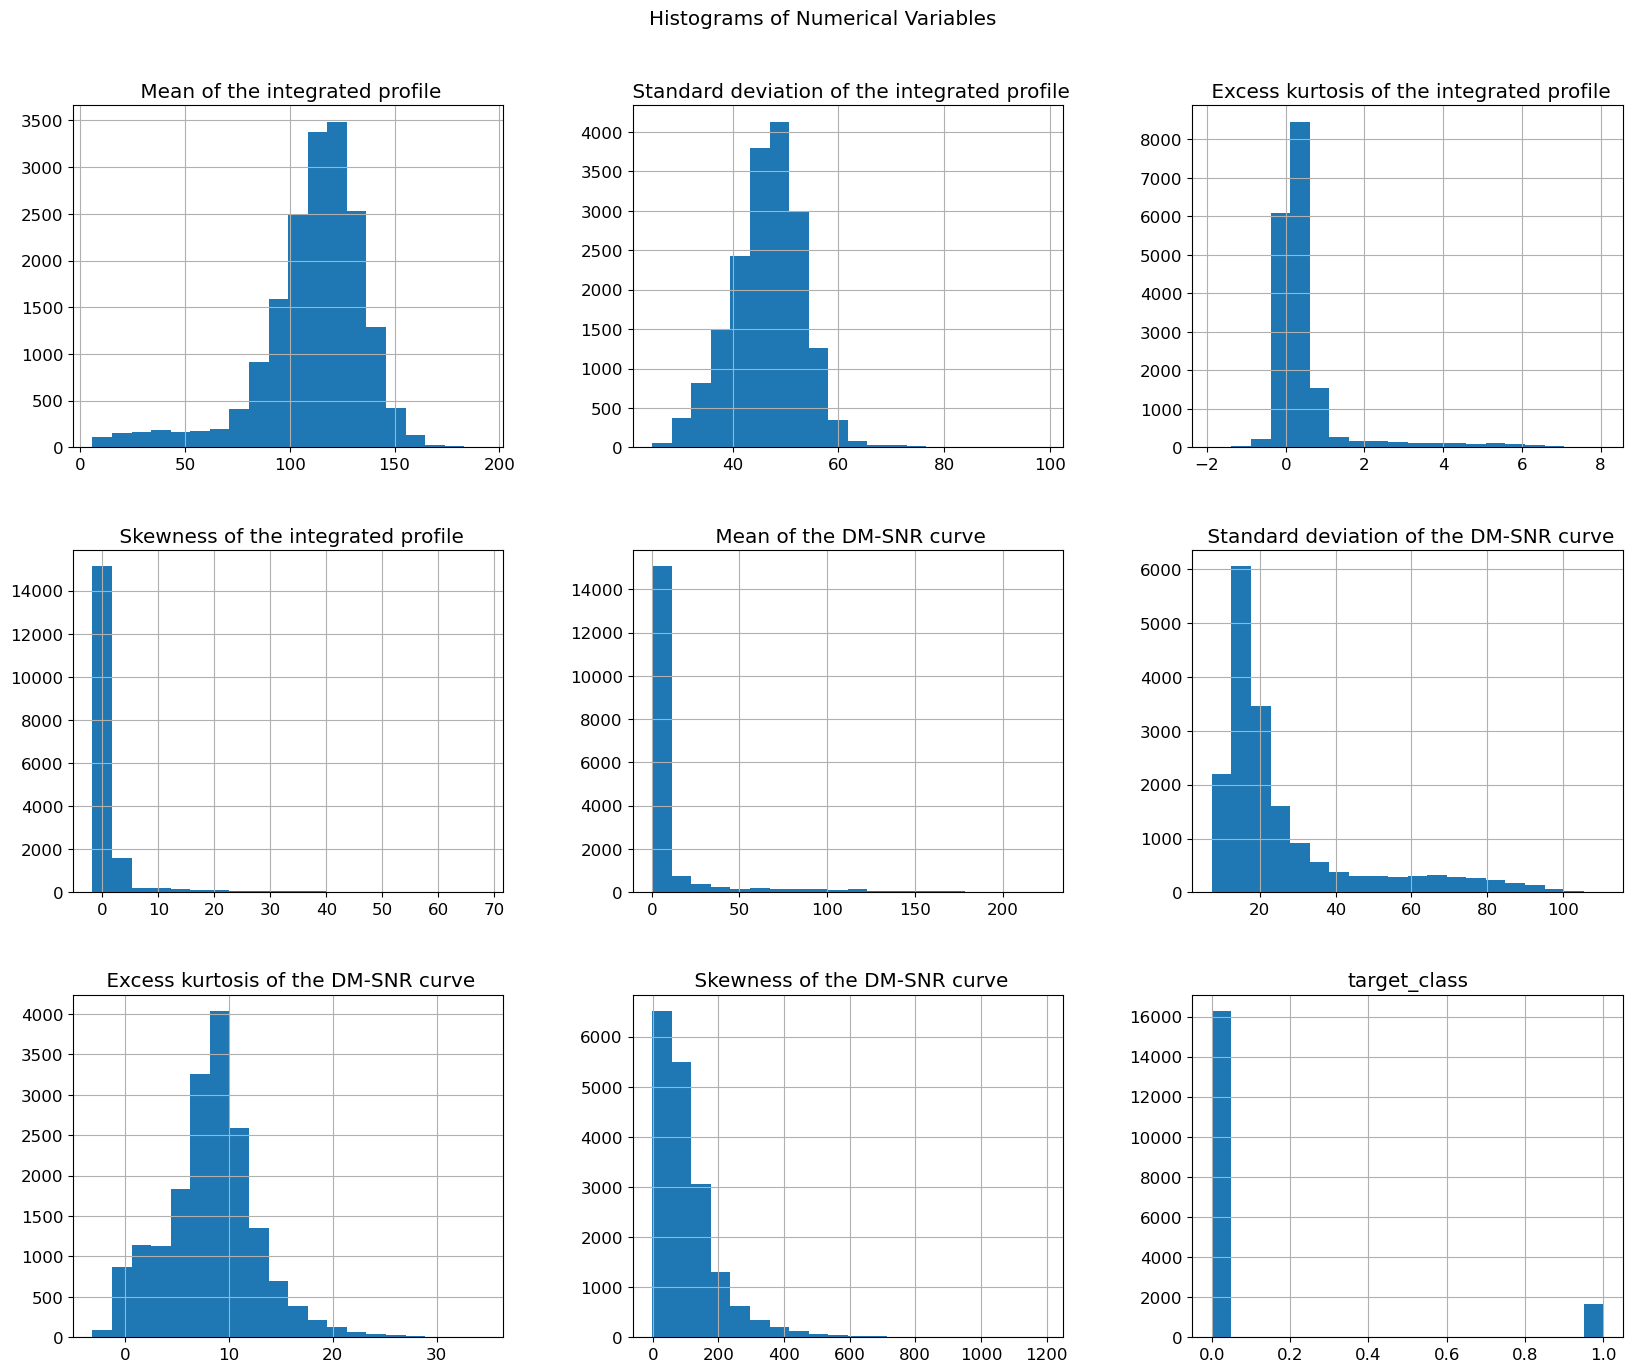

In [271]:
plt.figure(figsize=(24, 20))
data.hist(figsize=(20, 16), bins=20)
plt.suptitle('Histograms of Numerical Variables', y=0.94)
plt.show()

In [272]:
X = data.drop('target_class',axis=1)
y = data['target_class']

In [273]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [274]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [275]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [276]:
svm_classifier = SVC()

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)
y_score = svm_classifier.decision_function(X_test_scaled)

In [277]:
accuracy =accuracy_score(y_test, y_pred)

In [278]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9796


In [279]:
# SVM with RBF kernel and C=100.0
svm_rbf = SVC(kernel='rbf', C=100.0)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_rbf

0.982122905027933

In [280]:
# SVM with linear kernel and C=100.0
svm_linear = SVC(kernel='linear',C=100.0)
svm_linear.fit(X_train_scaled,y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test,y_pred_linear)
accuracy_linear

0.979050279329609

In [281]:
# Confusion matrix for RBF kernel
conf_matrix_rbf = confusion_matrix(y_test,y_pred_rbf)
conf_matrix_rbf

array([[3245,   14],
       [  50,  271]], dtype=int64)

In [282]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[3242,   17],
       [  56,  265]], dtype=int64)

In [283]:
# Confusion matrix for linear kernel
conf_matrix_linear = confusion_matrix(y_test,y_pred_linear)
conf_matrix_linear

array([[3243,   16],
       [  59,  262]], dtype=int64)

In [284]:
# print classification error
error = 1 - accuracy
error

0.020391061452514014

In [285]:
# print classification error for rbf
error_rbf = 1 - accuracy_rbf
error_rbf

0.01787709497206702

In [286]:
# print classification error for linear
error_linear = 1- accuracy_linear
error_linear

0.020949720670391025

In [287]:
# Precision score
precision_score(y_test,y_pred)

0.9397163120567376

In [288]:
# Precision for rbf
precision_score(y_test,y_pred_rbf)

0.9508771929824561

In [289]:
# Precision for linear
precision_score(y_test,y_pred_linear)

0.9424460431654677

In [290]:
# Recall score
recall_score(y_test,y_pred)

0.8255451713395638

In [291]:
# Recall score for rbf
recall_score(y_test,y_pred_rbf)

0.8442367601246106

In [292]:
# Recall score for linear
recall_score(y_test,y_pred_linear)

0.8161993769470405

In [293]:
# plot ROC Curve

fpr, tpr, thresholds= roc_curve(y_test,y_score)
auc(fpr,tpr)

0.9588324304896386

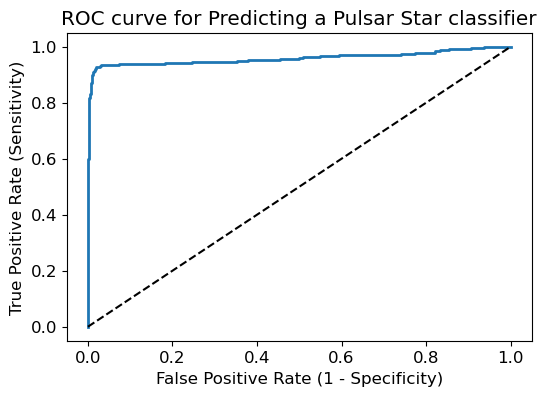

In [294]:
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [295]:
# compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9102


In [297]:
# calculate cross-validated ROC AUC
Cross_validated_ROC_AUC = cross_val_score(svm_classifier, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9518
